In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
np.random.seed(0)
SAMPLES = 1000
NOISE = 0.01
COEF = np.array([0.1, -2.1, 1.1, 0.2])  #b0, b1, b2, b3

### Generate multidimensional data with high correlation between two of the features

We will be using a 3D example

In [3]:
def generate_dataset(correlated = True):
    # Create a sample with three independent variables, two of them highly correlated
    # The first column in X corresponds to the intercept coefficient
    X = np.random.rand(SAMPLES, 2)
    if correlated:
        X = np.hstack((X, X[:, 1][:, np.newaxis]))
    else:
        X = np.hstack((X, np.random.rand(SAMPLES, 1)))
    X = np.hstack((np.ones((SAMPLES, 1)), X))
    # Calculating the value of the dependent variable before adding noise
    y = np.dot(X, COEF)
    # Adding some normal random noise
    X[:, 1:] = X[:, 1:] + NOISE * np.random.randn(SAMPLES, 3)
    
    return (X, y)
(X, y) = generate_dataset()

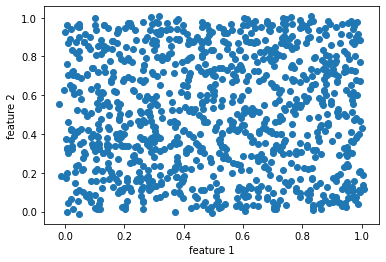

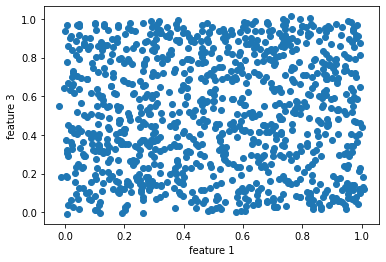

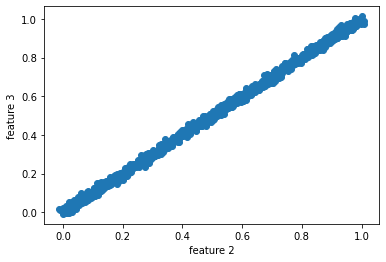

In [4]:
for ind in list(combinations(range(1, X.shape[1]), 2)):
    _, ax = plt.subplots()
    ax.scatter(X[:, ind[0]], X[:, ind[1]])
    ax.set_xlabel('feature ' + str(ind[0]))
    ax.set_ylabel('feature ' + str(ind[1]))

In [5]:
# Show the effect of colinearity on least squares
def test_impact_colinearity(correlated=True):
    print('Actual coefficients = ' + str(COEF))
    res = []
    for i in range(10):
        (X, y) = generate_dataset(correlated=correlated)
        res.append(np.dot(y, np.dot(X, np.linalg.inv(np.dot(X.T, X)))))
        print(res[-1])
    print('Standard deviation: '+ str(np.std(np.array(res), axis = 0)))

In [6]:
test_impact_colinearity(correlated=True)

Actual coefficients = [ 0.1 -2.1  1.1  0.2]
[ 0.09803658 -2.0983689   0.67149636  0.62978326]
[ 0.09730805 -2.09483693  0.65932328  0.64015266]
[ 0.09690426 -2.09671281  0.67561463  0.62634185]
[ 0.09861427 -2.0952986   0.69976792  0.60215196]
[ 0.10343311 -2.10425111  0.60409519  0.69329668]
[ 0.10164649 -2.09726362  0.67601963  0.62078524]
[ 0.09984711 -2.09799857  0.82325011  0.47612632]
[ 0.1011742  -2.09832894  0.56785405  0.7298791 ]
[ 0.10010009 -2.09611506  0.59731805  0.70039382]
[ 0.09923332 -2.09556689  0.66100035  0.63510515]
Standard deviation: [0.00194247 0.00255988 0.06654598 0.06582243]


In [7]:
# Are we sure that this is not noise effect?
# Yes, the variability of the highly correlated dependent variables is an 
# order of magnitude higher than those that are not correlated (see cell above)
test_impact_colinearity(correlated=False)

Actual coefficients = [ 0.1 -2.1  1.1  0.2]
[ 0.10038559 -2.09322755  1.09713312  0.19908079]
[ 0.09838585 -2.09837545  1.09995022  0.2022349 ]
[ 0.09874541 -2.09201907  1.09665615  0.19952526]
[ 0.0942684  -2.0937082   1.10189341  0.1979887 ]
[ 0.09602149 -2.09582052  1.10210231  0.20357248]
[ 0.10000445 -2.09788549  1.09986081  0.19866642]
[ 0.09886541 -2.09269484  1.09626381  0.19713643]
[ 0.10169012 -2.10387499  1.10100228  0.20185325]
[ 0.09773604 -2.09578149  1.09896074  0.20133623]
[ 0.09717288 -2.09857422  1.10222168  0.2035652 ]
Standard deviation: [0.00205669 0.00342412 0.0021643  0.00219823]


In [16]:
# Ridge regression implementation
def ridge_regression(k):
    return np.dot(y, np.dot(X, np.linalg.inv(np.dot(X.T, X) + k * np.identity(X.shape[1]))))

In [9]:
# Selecting k with a ridge trace


In [ ]:
# Check that there is less variance with that k - add RMSE

In [10]:
# Another way of selecting k is cross validation, but I am not implementing that